# Machine Learning: Assignment -1

 ## Problem Statement: Predict class of Iris plant using a decision tree

### Import required libraries        

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Import the data from Iris Dataset

Columns Names from Iris dataset downloaded from [UCI Iris Data Set](http://archive.ics.uci.edu/ml/machine-learning-databases/iris)

Reference file: [UCI Iris Data Set Description](http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names)

In [2]:
irisDataSet = pd.read_csv("iris.csv", names=['sepal_length','sepal_width','petal_length','petal_width','class'], header=None)
irisDataSet.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
irisDataSet.shape

(150, 5)

In [4]:
irisDataSet["class"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

##### from the above output we can conclude that it is a balanced dataset

In [5]:
feature_names = ['Sepal Length','Sepal Width','Petal Length','Petal Width']
feature_names

['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

In [6]:
# Fetching the unique values present in `class` column of the data. 
# These unique values array will be utilised after prediction like - `Confusion Matrix`
dataFrame = pd.DataFrame(irisDataSet)
class_names = dataFrame["class"].unique()
print(class_names)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### 2. Consider all columns as independent variables and assign to variable X except the last column and consider the last column as dependent variable and assign to variable y.


#### Independent variable Feature Matrix (X-Axis)

In [7]:
xAxisData = irisDataSet.iloc[:, :-1]
xAxisData.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Dependent variable Feature Matrix (Y-axis)

In [8]:
yAxisData = irisDataSet.iloc[:, [-1]]
yAxisData.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


### 3. Compute some basic statistical details like percentile, mean, standard deviation of dataset

In [9]:
irisDataSet.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Visualising the dataset

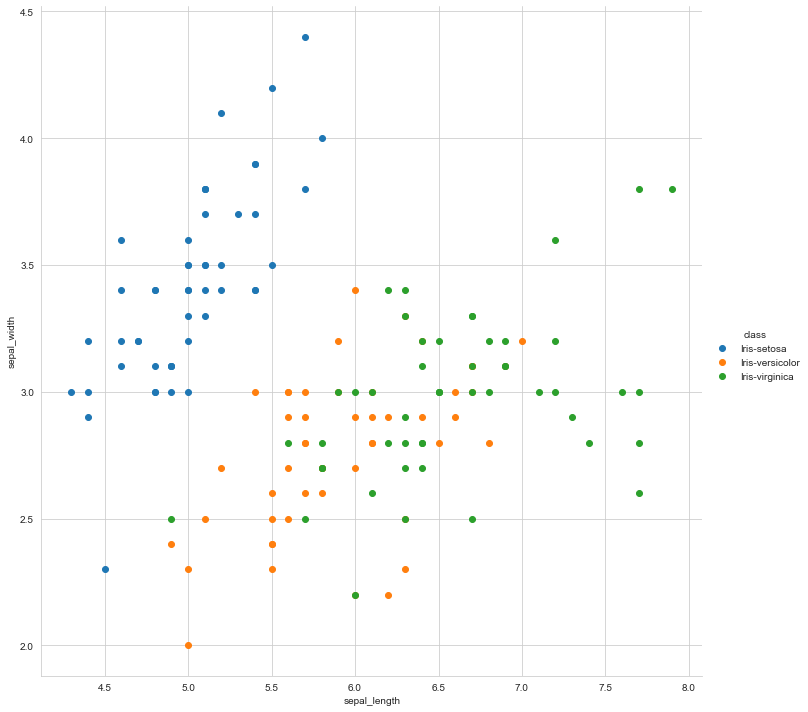

In [10]:
sns.set_style('whitegrid')
sns.FacetGrid(irisDataSet, hue='class', height=10).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()
plt.show()

### 4. Encode all the categorical columns into numeric

#### Since, machine learning algorithm can only read numerical values. It is essential to encoding categorical features into numerical values.    

In [11]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
irisDataSet['class'] = labelEncoder.fit_transform(irisDataSet['class'])
irisDataSet

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 5. Do Feature Scaling on Independent variables

##### X-Axis data before scaling

In [12]:
print(xAxisData)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


##### Performing scaling on X-Axis data

In [13]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
scaledData = minMaxScaler.fit_transform(xAxisData)
print(scaledData)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

##### Feature Scaling -
Since for this assignment we are advised to use `Decision tree classification` algorithm thus we may not see affect of `Feature Scaling` since feature scaling is essential for machine learning algorithms that calculate distances between data.

Algorithms that do not require normalization/scaling are the ones that rely on rules. They would not be affected by any monotonic transformations of the variables. Scaling is a monotonic transformation. Examples of algorithms in this category are all the tree-based algorithms.

Reference:- [All About Feature Scaling](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)

### 6. Split the data into train and test dataset

##### Prepare the independent variable data (X-axis)

In [14]:
xAxisData = scaledData #`scaledData` is used from previous cell since it contains scaled dataset for X-Axis
xAxisData

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

##### Prepare the dependent variable data (Y-axis)

In [15]:
yAxisData = np.array(irisDataSet['class'])
yAxisData

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Spliting data into training & testing - 75% & 25% respectively

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xAxisData, yAxisData, test_size=0.25)

In [17]:
print("X-axis training data - ", X_train.shape)
print("X-axis test data     - ", X_test.shape)
print("Y-axis training data - ", y_train.shape)
print("Y-axis test data     - ", y_test.shape)

X-axis training data -  (112, 4)
X-axis test data     -  (38, 4)
Y-axis training data -  (112,)
Y-axis test data     -  (38,)


### 7. Use sklearn library to train on train dataset on decision tree and predict on test dataset 

#### Applying Decision Tree classification model

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
model = classifier.fit(X_train, y_train)
y_predictions = classifier.predict(X_test)

#### Plot the DecisionTree which is trained on the above Iris dataset

In [19]:
import graphviz 
dot_data = tree.export_graphviz(classifier, out_file=None,
                               class_names=class_names,
                               feature_names=feature_names,
                               filled = 'true', rounded='true') 

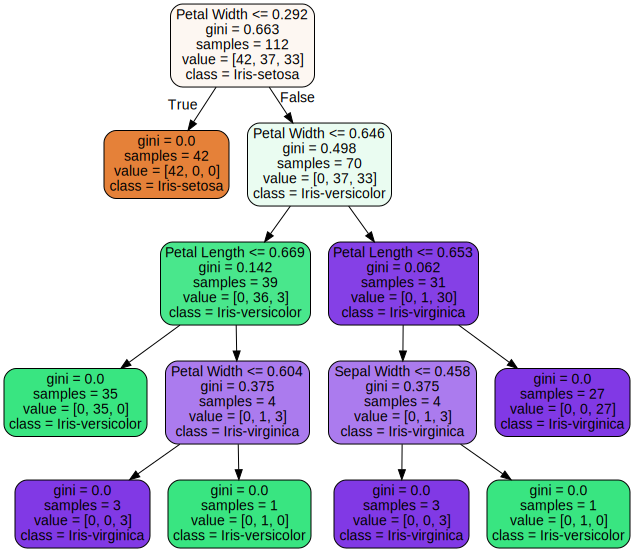

In [20]:
graph = graphviz.Source(dot_data)  
graph 

### 8. Compute the accuracy and precision

In [21]:
from sklearn.metrics import classification_report
# Display classification report against respective classes
print(classification_report(y_test, y_predictions, target_names=class_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.94      0.94      0.94        17

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



#### Plotting Confusion Matrix to understand the quality of the output of classifier

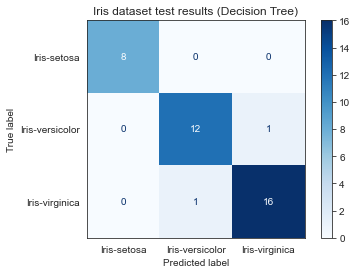

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

sns.set_style('white')
plot_confusion_matrix(classifier, X_test, y_test,
                     display_labels=class_names,
                     cmap=plt.cm.Blues,
                     normalize=None)
plt.title('Iris dataset test results (Decision Tree)')
plt.show()

##### Accuracy

In [23]:
from sklearn.metrics import accuracy_score
print('Accuracy score = ',accuracy_score(y_predictions, y_test))

Accuracy score =  0.9473684210526315
